In [1]:
from tensorflow.keras import models,layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=50, batch_size=200, callbacks=[early_stopping])

Epoch 1/50
225/225 [==============================] - 23s 99ms/step - loss: 0.3120 - accuracy: 0.9024 - val_loss: 0.0750 - val_accuracy: 0.9789
Epoch 2/50
225/225 [==============================] - 22s 100ms/step - loss: 0.0956 - accuracy: 0.9717 - val_loss: 0.0528 - val_accuracy: 0.9846
Epoch 3/50
225/225 [==============================] - 24s 105ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0493 - val_accuracy: 0.9853
Epoch 4/50
225/225 [==============================] - 22s 98ms/step - loss: 0.0530 - accuracy: 0.9837 - val_loss: 0.0414 - val_accuracy: 0.9879
Epoch 5/50
225/225 [==============================] - 23s 103ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0397 - val_accuracy: 0.9883
Epoch 6/50
225/225 [==============================] - 24s 108ms/step - loss: 0.0409 - accuracy: 0.9871 - val_loss: 0.0388 - val_accuracy: 0.9881
Epoch 7/50
225/225 [==============================] - 23s 103ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0374 - val_accu

In [8]:
print('Test Accuracy: %.4f' % model.evaluate(X_test, y_test)[1])

313/313 [==============================] - 5s 16ms/step - loss: 0.0359 - accuracy: 0.9905
Test Accuracy: 0.9905


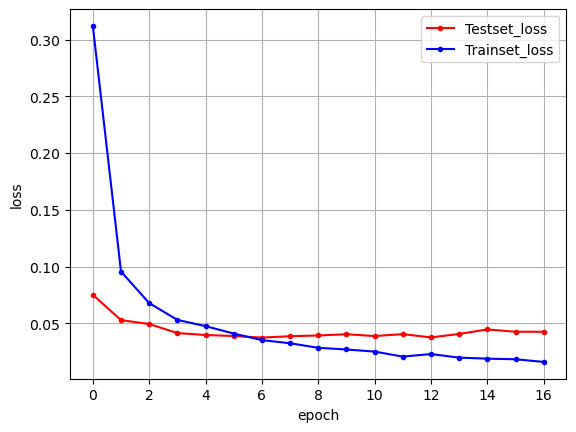

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()